<a href="https://colab.research.google.com/github/himanshu2294/GBM_notebook/blob/master/AV_Computer_Vision_Transfer_Learning_Resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



     |████████████████████████████████| 993kB 2.5MB/s 


In [2]:
import os
file_list = drive.ListFile().GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname =  f['title']
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


title:  AV_Computer_Vision_Transfer Learning Resnet 50.ipynb, id: 1jIYzfU9sIG0WhKGM9tASjO5UOGYqukz6
downloading to  AV_Computer_Vision_Transfer Learning Resnet 50.ipynb
title: AV_Computer_Vision_Transfer Learning Inception V3.ipynb, id: 1LRCFPyBjcC3CpmwXtl1VJFYSQycyxHPa
downloading to AV_Computer_Vision_Transfer Learning Inception V3.ipynb
title: Untitled11.ipynb, id: 1vY0QHrRELKhgad4WoF7LkZ7agv2mYN4A
downloading to Untitled11.ipynb
title: AV_Computer_Vision_Iter1.ipynb, id: 1oIxQv2VkPUt6X4XTbRfaZV6_bfYlUvSd
downloading to AV_Computer_Vision_Iter1.ipynb
title: ML Hikethon.ipynb, id: 1rDOhihP6VIajlsrr19pNeSdpsoqgLI7a
downloading to ML Hikethon.ipynb
title: train.zip, id: 1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN
downloading to train.zip
title: Copy of Kaggle API access example.ipynb, id: 1BeeVYJFGhNBO6tPM7OT64QD3X1wNXx8V
downloading to Copy of Kaggle API access example.ipynb
title: Kaggle API NN and Lgbm, id: 17F8Ra1AFnO_T3vhmZXkecewM-BofhHUd
downloading to Kaggle API NN and Lgbm
title: Copy of

FileNotDownloadableError: ignored

In [3]:
!unzip train.zip

Archive:  train.zip
   creating: images/
  inflating: images/2870091.jpg      
   creating: __MACOSX/
   creating: __MACOSX/images/
  inflating: __MACOSX/images/._2870091.jpg  
  inflating: images/2860282.jpg      
  inflating: __MACOSX/images/._2860282.jpg  
  inflating: images/2894465.jpg      
  inflating: __MACOSX/images/._2894465.jpg  
  inflating: images/2784253.jpg      
  inflating: __MACOSX/images/._2784253.jpg  
  inflating: images/2853890.jpg      
  inflating: __MACOSX/images/._2853890.jpg  
  inflating: images/2898539.jpg      
  inflating: __MACOSX/images/._2898539.jpg  
  inflating: images/644577.jpg       
  inflating: __MACOSX/images/._644577.jpg  
  inflating: images/2856056.jpg      
  inflating: __MACOSX/images/._2856056.jpg  
  inflating: images/2792357.jpg      
  inflating: __MACOSX/images/._2792357.jpg  
  inflating: images/2904710.jpg      
  inflating: __MACOSX/images/._2904710.jpg  
  inflating: images/2748659.jpg      
  inflating: __MACOSX/images/._2748659.

In [4]:
!ls -l

total 90316
-rw-r--r-- 1 root root     2487 May 31 16:22  adc.json
-rw-r--r-- 1 root root   937882 May 31 16:22  AV_Computer_Vision_Iter1.ipynb
-rw-r--r-- 1 root root  1047839 May 31 16:22 'AV_Computer_Vision_Transfer Learning Inception V3.ipynb'
-rw-r--r-- 1 root root   945458 May 31 16:22 ' AV_Computer_Vision_Transfer Learning Resnet 50.ipynb'
-rw-r--r-- 1 root root  1764678 May 31 16:22 'Copy of Kaggle API access example.ipynb'
-rw-r--r-- 1 root root    29384 May 31 16:22 'Copy of Kaggle API NN and Lgbm'
drwxrwxr-x 2 root root   266240 May  8 09:07  images
-rw-r--r-- 1 root root    33725 May 31 16:22 'Kaggle API NN and Lgbm'
drwxrwxr-x 3 root root     4096 May 23 10:10  __MACOSX
-rw-r--r-- 1 root root    36265 May 31 16:22 'ML Hikethon.ipynb'
drwxr-xr-x 1 root root     4096 May 24 16:08  sample_data
-rw-rw-r-- 1 root root    87282 May 23 10:07  train.csv
-rw-r--r-- 1 root root 87294609 May 31 16:22  train.zip
-rw-r--r-- 1 root root      287 May 31 16:22  Untitled10.ipynb
-rw-r--r-- 

In [5]:
import zipfile
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
# Reading data 

train_df = pd.read_csv('train.csv')


Using TensorFlow backend.


In [0]:
try:
    os.mkdir('./images/1')
    os.mkdir('./images/2')
    os.mkdir('./images/3')
    os.mkdir('./images/4')
    os.mkdir('./images/5')
    
    os.mkdir('./all_categories')
    os.mkdir('./all_categories/testing')
    os.mkdir('./all_categories/training')
    
    os.mkdir('./all_categories/training/1')
    os.mkdir('./all_categories/training/2')
    os.mkdir('./all_categories/training/3')
    os.mkdir('./all_categories/training/4')
    os.mkdir('./all_categories/training/5')
    
    os.mkdir('./all_categories/testing/1')
    os.mkdir('./all_categories/testing/2')
    os.mkdir('./all_categories/testing/3')
    os.mkdir('./all_categories/testing/4')
    os.mkdir('./all_categories/testing/5')
    
except OSError:
    pass

In [0]:

path = "./images/"
destination = "./images/"
for image,category in zip(train_df.image.values, train_df.category.values):
  copyfile(path+image, destination+str(category)+"/"+image)

In [8]:
display(train_df.category.value_counts()); display(len(os.listdir("./images/3"))) 
## 2 additional because of training and testing directories inside a class

1    2120
5    1217
2    1167
3     916
4     832
Name: category, dtype: int64

916

In [0]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
      file = SOURCE + filename
      if os.path.getsize(file) > 0:
          files.append(filename)
      else:
          print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


In [0]:
cat_1_SOURCE_DIR = "./images/1/"
cat_2_SOURCE_DIR = "./images/2/"
cat_3_SOURCE_DIR = "./images/3/"
cat_4_SOURCE_DIR = "./images/4/"
cat_5_SOURCE_DIR = "./images/5/"

TRAINING_CATS_1_DIR = "./all_categories/training/1/"
TRAINING_CATS_2_DIR = "./all_categories/training/2/"
TRAINING_CATS_3_DIR = "./all_categories/training/3/"
TRAINING_CATS_4_DIR = "./all_categories/training/4/"
TRAINING_CATS_5_DIR = "./all_categories/training/5/"

TESTING_CATS_1_DIR = "./all_categories/testing/1/"
TESTING_CATS_2_DIR = "./all_categories/testing/2/"
TESTING_CATS_3_DIR = "./all_categories/testing/3/"
TESTING_CATS_4_DIR = "./all_categories/testing/4/"
TESTING_CATS_5_DIR = "./all_categories/testing/5/"

In [0]:
split_size = 0.8
split_data(cat_1_SOURCE_DIR, TRAINING_CATS_1_DIR, TESTING_CATS_1_DIR, split_size)
split_data(cat_2_SOURCE_DIR, TRAINING_CATS_2_DIR, TESTING_CATS_2_DIR, split_size)
split_data(cat_3_SOURCE_DIR, TRAINING_CATS_3_DIR, TESTING_CATS_3_DIR, split_size)
split_data(cat_4_SOURCE_DIR, TRAINING_CATS_4_DIR, TESTING_CATS_4_DIR, split_size)
split_data(cat_5_SOURCE_DIR, TRAINING_CATS_5_DIR, TESTING_CATS_5_DIR, split_size)

In [12]:
len(os.listdir(TESTING_CATS_4_DIR))

167

In [0]:
## REading images from /images directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions


In [0]:
# # Download the inception v3 weights
# !wget --no-check-certificate \
#     https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O ./resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

In [36]:

# Import the Resnet50 model
base_model = ResNet50(input_shape = (224, 224, 3), weights='imagenet', include_top=False)

# Make all the layers in the pre-trained model non-trainable
for layer in base_model.layers:
  layer.trainable = False
  
# Print the model summary
base_model.summary()


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [41]:
last_layer = base_model.get_layer('activation_96')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 512)


In [0]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_categorical_accuracy')>0.85):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

      

In [43]:
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import layers
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = last_output
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(x)
# x = layers.Conv2D(16, (3,3),activation='relu')(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(x)

x = layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(100, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x) 
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

model = Model( base_model.input, x) 

model.compile(optimizer = SGD(lr=0.05), 
              loss = 'categorical_crossentropy', 
              metrics = ['categorical_accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [44]:

TRAINING_DIR = "./all_categories/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.,rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))

VALIDATION_DIR = "./all_categories/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.,rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=64,
                                                              class_mode='categorical',
                                                              target_size=(224, 224))

Found 4999 images belonging to 5 classes.
Found 1253 images belonging to 5 classes.


In [45]:
# Note that this may take some time.


callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            callbacks=[callbacks])

Epoch 1/100
79/79 [==============================] - 71s 903ms/step - loss: 1.1374 - categorical_accuracy: 0.5331 - val_loss: 1.9393 - val_categorical_accuracy: 0.3384
Epoch 2/100
79/79 [==============================] - 65s 828ms/step - loss: 0.8237 - categorical_accuracy: 0.6789 - val_loss: 1.8368 - val_categorical_accuracy: 0.3360
Epoch 3/100
79/79 [==============================] - 64s 811ms/step - loss: 0.7433 - categorical_accuracy: 0.7161 - val_loss: 1.7439 - val_categorical_accuracy: 0.3384
Epoch 4/100
79/79 [==============================] - 64s 807ms/step - loss: 0.6807 - categorical_accuracy: 0.7351 - val_loss: 2.1708 - val_categorical_accuracy: 0.3384
Epoch 5/100
79/79 [==============================] - 66s 831ms/step - loss: 0.6613 - categorical_accuracy: 0.7409 - val_loss: 2.2473 - val_categorical_accuracy: 0.3384
Epoch 6/100
79/79 [==============================] - 66s 830ms/step - loss: 0.6526 - categorical_accuracy: 0.7534 - val_loss: 2.4140 - val_categorical_accuracy:

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

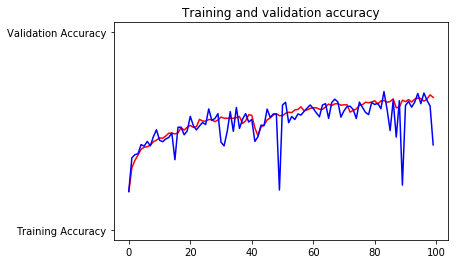

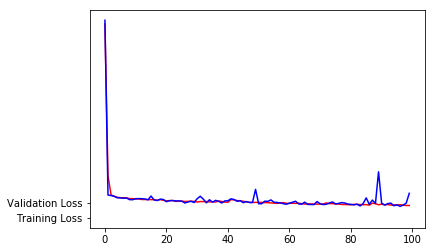

<Figure size 432x288 with 0 Axes>

In [34]:
  %matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [0]:
## Scoring Testing dataset
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()



Saving test_ApKoW4T.csv to test_ApKoW4T.csv


In [0]:
df_test = pd.read_csv('test_ApKoW4T.csv')

In [0]:
df_test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [0]:
try:
  os.mkdir('./eval_performance/test/')
except:
  pass
for im in df_test.image.values:
  copyfile("./images/"+im , './eval_performance/test/'+im)

In [0]:
ep_datagen = ImageDataGenerator(rescale=1./255)

ep_generator = ep_datagen.flow_from_directory(
        './eval_performance/',
        target_size=(150, 150),
        shuffle = False,
        class_mode=None,
        batch_size=100)

filenames = ep_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(ep_generator,steps = nb_samples)

Found 2680 images belonging to 1 classes.


In [0]:
predict_class= []

for i in predict:
  predict_class.append(np.argmax(i)+1)

In [0]:
df_test['category'] = predict_class

In [0]:
df_test.to_csv('Result_1.csv', index = False)

In [0]:
files.download('./Result_1.csv')